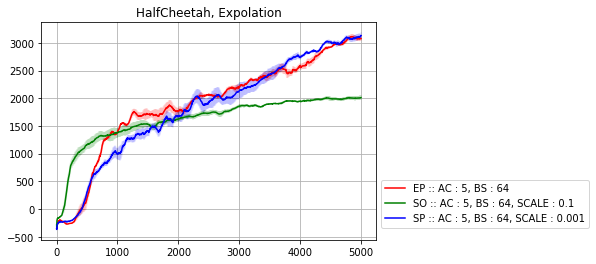

################################################

GRAPH1 : EP :: AC : 5, BS : 64
    MAX : 3115.188, EPISODE : 4845, STD : 101.802
    MAX1 :: 3077.689, MAX2 :: 3035.6, MAX3 :: 3260.309

GRAPH2 : SO :: AC : 5, BS : 64, SCALE : 0.1
    MAX : 2013.182, EPISODE : 4807, STD : 95.665
    MAX1 :: 1931.058, MAX2 :: 2127.625, MAX3 :: 2035.847

GRAPH3 : SP :: AC : 5, BS : 64, SCALE : 0.001
    MAX : 3132.286, EPISODE : 5000, STD : 158.643
    MAX1 :: 3236.54, MAX2 :: 3248.336, MAX3 :: 2995.908

################################################


In [3]:
import pickle
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np


####################################

EP1 = ['HalfCheetah_E(4)P_(32,10,40,8,1,0.0001)', 'EP :: BS : 32']
EP2 = ['HalfCheetah_E(4)P_(64,10,40,8,1,0.0001)', 'EP :: BS : 64']
EP3 = ['HalfCheetah_E(4)P_(128,10,40,8,1,0.0001)', 'EP :: BS : 128']

EP4 = ['HalfCheetah_E(3)P_(64,10,40,8,1,0.0001)', 'EP :: AC : 3, BS : 64']
EP5 = ['HalfCheetah_E(5)P_(64,10,40,8,1,0.0001)', 'EP :: AC : 5, BS : 64']

EP6 = ['HalfCheetah_E(4)P_(32,10,100,32,1,0.0001)', 'EP :: BS : 32, ED : 32']
EP7 = ['HalfCheetah_E(4)P_(64,10,100,32,1,0.0001)', 'EP :: BS : 64, ED : 32']


#SO1 = ['HalfCheetah_S(4)P_(32,10,40,8,1,1,0.0001)', 'SO :: BS : 32, SCALE : 1']
SO2 = ['HalfCheetah_S(4)P_(32,10,40,8,0.1,1,0.0001)', 'SO :: BS : 32, SCALE : 0.1']
SO3 = ['HalfCheetah_S(4)P_(32,10,40,8,0.01,1,0.0001)', 'SO :: BS : 32, SCALE : 0.01']
SO4 = ['HalfCheetah_S(4)P_(32,10,40,8,0.001,1,0.0001)', 'SO :: BS : 32, SCALE : 0.001']

#SO5 = ['HalfCheetah_S(4)P_(64,10,40,8,1,1,0.0001)', 'SO :: BS : 64, SCALE : 1']
SO6 = ['HalfCheetah_S(4)P_(64,10,40,8,0.1,1,0.0001)', 'SO :: BS : 64, SCALE : 0.1']
SO7 = ['HalfCheetah_S(4)P_(64,10,40,8,0.01,1,0.0001)', 'SO :: BS : 64, SCALE : 0.01']
#SO8 = ['HalfCheetah_S(4)P_(64,10,40,8,0.001,1,0.0001)', 'SO :: BS : 64, SCALE : 0.001']

#SO9 = ['HalfCheetah_S(4)P_(128,10,40,8,1,1,0.0001)', 'SO :: BS : 128, SCALE : 1']
SO10 = ['HalfCheetah_S(4)P_(128,10,40,8,0.1,1,0.0001)', 'SO :: BS : 128, SCALE : 0.1']
SO11 = ['HalfCheetah_S(4)P_(128,10,40,8,0.01,1,0.0001)', 'SO :: BS : 128, SCALE : 0.01']
#SO12 = ['HalfCheetah_S(4)P_(128,10,40,8,0.001,1,0.0001)', 'SO :: BS : 128, SCALE : 0.001']

SO13 = ['HalfCheetah_S(3)P_(64,10,40,8,0.1,1,0.0001)', 'SO :: AC : 3, BS : 64, SCALE : 0.1']
SO14 = ['HalfCheetah_S(3)P_(64,10,40,8,0.01,1,0.0001)', 'SO :: AC : 3, BS : 64, SCALE : 0.01']
SO15 = ['HalfCheetah_S(5)P_(64,10,40,8,0.1,1,0.0001)', 'SO :: AC : 5, BS : 64, SCALE : 0.1']
SO16 = ['HalfCheetah_S(5)P_(64,10,40,8,0.01,1,0.0001)', 'SO :: AC : 5, BS : 64, SCALE : 0.01']


SP1 = ['HalfCheetah_SP(4)P_(32,10,40,8,1,1,0.0001)', 'SP :: BS : 32, SCALE : 1']
#SP2 = ['HalfCheetah_SP(4)P_(32,10,40,8,0.1,1,0.0001)', 'SP :: BS : 32, SCALE : 0.1']
SP3 = ['HalfCheetah_SP(4)P_(32,10,40,8,0.01,1,0.0001)', 'SP :: BS : 32, SCALE : 0.01']
SP4 = ['HalfCheetah_SP(4)P_(32,10,40,8,0.001,1,0.0001)', 'SP :: BS : 32, SCALE : 0.001']

#SP5 = ['HalfCheetah_SP(4)P_(64,10,40,8,1,1,0.0001)', 'SP :: BS : 64, SCALE : 1']
SP6 = ['HalfCheetah_SP(4)P_(64,10,40,8,0.1,1,0.0001)', 'SP :: BS : 64, SCALE : 0.1']
SP7 = ['HalfCheetah_SP(4)P_(64,10,40,8,0.01,1,0.0001)', 'SP :: BS : 64, SCALE : 0.01']
SP8 = ['HalfCheetah_SP(4)P_(64,10,40,8,0.001,1,0.0001)', 'SP :: BS : 64, SCALE : 0.001']

#SP9 = ['HalfCheetah_SP(4)P_(128,10,40,8,1,1,0.0001)', 'SP :: BS : 128, SCALE : 1']
#SP10 = ['HalfCheetah_SP(4)P_(128,10,40,8,0.1,1,0.0001)', 'SP :: BS : 128, SCALE : 0.1']
SP11 = ['HalfCheetah_SP(4)P_(128,10,40,8,0.01,1,0.0001)', 'SP :: BS : 128, SCALE : 0.01']
SP12 = ['HalfCheetah_SP(4)P_(128,10,40,8,0.001,1,0.0001)', 'SP :: BS : 128, SCALE : 0.001']

SP13 = ['HalfCheetah_SP(3)P_(64,10,40,8,0.01,1,0.0001)', 'SP :: AC : 3, BS : 64, SCALE : 0.01']
SP14 = ['HalfCheetah_SP(3)P_(64,10,40,8,0.001,1,0.0001)', 'SP :: AC : 3, BS : 64, SCALE : 0.001']
SP15 = ['HalfCheetah_SP(5)P_(64,10,40,8,0.01,1,0.0001)', 'SP :: AC : 5, BS : 64, SCALE : 0.01']
SP16 = ['HalfCheetah_SP(5)P_(64,10,40,8,0.001,1,0.0001)', 'SP :: AC : 5, BS : 64, SCALE : 0.001']

####################################

iteration = 3

#file_name_list = [EP1, EP2, EP3]
#file_name_list = [EP1, SP1, SP3, SP4]

#file_name_list = [EP3, SP11, SP12, SO11, SO10]

#file_name_list = [EP4, SP14, SO13]
#file_name_list = [EP4, SP13, SP14, SO13, SO14]

#file_name_list = [EP5, SO15, SP16]

#file_name_list = [EP2, SP7, SP8, SO6, SO7]
#file_name_list = [SO2, SO3]
#file_name_list = [SO3, SO7, SO11]
#file_name_list = [SP3, SP7, SP11]

#file_name_list = [EP1, SO3, SP1, SP3, SP4]
#file_name_list = [SP1, SP2, SP3]
#file_name_list = [SO1, SO2, SO3]
#file_name_list = [EP1, SO1, SP1, SP2]

graph_color = ['r', 'g', 'b', 'y', 'm', 'c']

####################################
max_list = []

max_avg_list = []
max_avg_epi_list = []
std_list = []

for i in range(len(file_name_list)):
    step_avg_list = []

    for j in range(iteration):
        with open('/home/jolp/Desktop/Data/'+file_name_list[i][0]+'_seed'+str(j+1), 'rb') as fin1:
            step_avg_list.append(pickle.load(fin1))

    step_avg_list = np.array(step_avg_list)

    print_step_avg_list = np.average(step_avg_list, axis=0)
    print_step_std_list = np.std(step_avg_list, axis=0)
    
    max_list.append(np.max(step_avg_list, axis=1))
    
    max_avg_list.append(np.max(print_step_avg_list))
    max_avg_epi_list.append(np.argmax(print_step_avg_list))
    #std_list.append(print_step_std_list[max_avg_epi_list[i]])
    std_list.append(np.average(print_step_std_list))
    
    len_file = len(print_step_avg_list)
    x_values = list(range(1, len_file+1))
    y_values = print_step_avg_list[:]

    plt.plot(x_values, y_values, c=graph_color[i], label=file_name_list[i][1])
    plt.errorbar(x_values, y_values, yerr = 0.5*print_step_std_list, ecolor=graph_color[i], alpha=0.01)

plt.title('HalfCheetah, Expolation')
plt.grid(True)
plt.legend(loc=2, bbox_to_anchor=(1., 0.3))
plt.show()

print('################################################')
for i in range(len(file_name_list)):
    print('')
    print('GRAPH{} : {}'.format(i+1,file_name_list[i][1]))
    print('    MAX : {}, EPISODE : {}, STD : {}'.format(round(max_avg_list[i],3), max_avg_epi_list[i]+1, round(std_list[i],3)))
    if iteration == 3:
        print('    MAX1 :: {}, MAX2 :: {}, MAX3 :: {}'.format(round(max_list[i][0],3),round(max_list[i][1],3),round(max_list[i][2],3)))
    if iteration == 2:
        print('    MAX1 :: {}, MAX2 :: {}'.format(round(max_list[i][0],3),round(max_list[i][1],3)))
print('')
print('################################################')
